In [15]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path("..").resolve()
sys.path.append(str(project_root))

import numpy as np
import matplotlib.pyplot as plt
from experiments.datasets import make_double_linear
from experiments.datasets import plot_data
from src.models.mlp1 import Mlp1

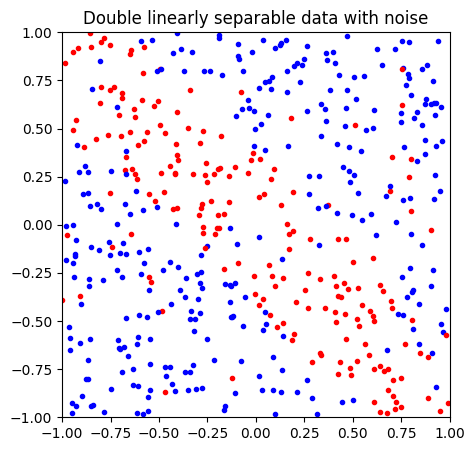

In [57]:
X_states, y_labels = make_double_linear(p=500, noise_rate=0.1)

plot_title = "Double linearly separable data with noise"
plot_data(X_states, y_labels, plot_title)

In [62]:
model = Mlp1(input_dim=2, hidden_dim=4, lr=0.1)

outputs, _ = model.forward(X_states)  # _ is cache, not needed here
w, b = model.W2, model.b2

loss = 0.5 * ((y_labels - outputs)**2).mean()
predictions = model.predict(X_states)
accuracy = (predictions == y_labels).mean()

print(f"Loss before training: {loss:.4f} – Accuracy before training: {accuracy:.2f}")

Loss before training: 0.8072 – Accuracy before training: 0.49


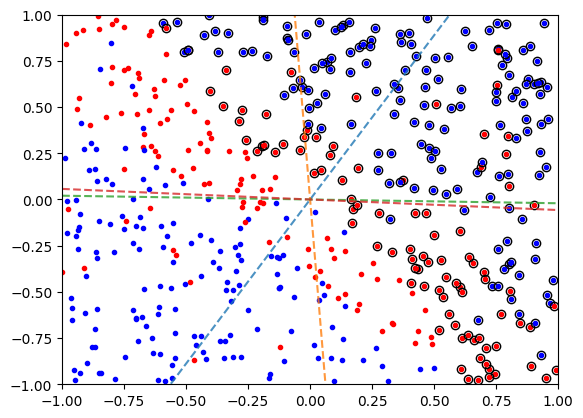

In [63]:
# Plot, let red be in the set
for mu in range(len(y_labels)):
    if y_labels[mu] == 1 :
        plt.plot(X_states[mu,0], X_states[mu,1],'r.')
    else :
        plt.plot(X_states[mu,0], X_states[mu,1],'b.')
    # plot classification of network as circles
    if predictions[mu] == 1 :
        plt.plot(X_states[mu,0], X_states[mu,1],'ko',mfc='none')

# Plot decision boundaries of hidden neurons
x1_span = np.linspace(-1, 1, 100)
colors = plt.cm.tab10.colors  # distinct colors

for j in range(model.W1.shape[0]):
    w = model.W1[j]
    b = model.b1[j]
    color = colors[j % len(colors)]

    if abs(w[1]) < 1e-6:
        # vertical line: w0 * x - b = 0  ->  x = b / w0
        x = b / w[0]
        plt.axvline(x, linestyle="--", color=color, alpha=0.8)
    else:
        x2_span = (w[0] * x1_span - b) / w[1]
        plt.plot(x1_span, x2_span, "--", color=color, alpha=0.8)

plt.axis([-1, 1, -1, 1])
plt.show()

In [64]:
model.fit(X_states, y_labels, 50)

Out = model.predict(X_states)

Epoch 1/50 – Loss: 0.7043 – Accuracy: 0.64
Epoch 2/50 – Loss: 0.6996 – Accuracy: 0.65
Epoch 3/50 – Loss: 0.6943 – Accuracy: 0.65
Epoch 4/50 – Loss: 0.5291 – Accuracy: 0.60
Epoch 5/50 – Loss: 0.3058 – Accuracy: 0.79
Epoch 6/50 – Loss: 0.2789 – Accuracy: 0.83
Epoch 7/50 – Loss: 0.2697 – Accuracy: 0.84
Epoch 8/50 – Loss: 0.2687 – Accuracy: 0.84
Epoch 9/50 – Loss: 0.2718 – Accuracy: 0.84
Epoch 10/50 – Loss: 0.2718 – Accuracy: 0.83
Epoch 11/50 – Loss: 0.2706 – Accuracy: 0.84
Epoch 12/50 – Loss: 0.2687 – Accuracy: 0.84
Epoch 13/50 – Loss: 0.2656 – Accuracy: 0.84
Epoch 14/50 – Loss: 0.2656 – Accuracy: 0.84
Epoch 15/50 – Loss: 0.2646 – Accuracy: 0.84
Epoch 16/50 – Loss: 0.2630 – Accuracy: 0.85
Epoch 17/50 – Loss: 0.2616 – Accuracy: 0.85
Epoch 18/50 – Loss: 0.2604 – Accuracy: 0.85
Epoch 19/50 – Loss: 0.2590 – Accuracy: 0.86
Epoch 20/50 – Loss: 0.2572 – Accuracy: 0.86
Epoch 21/50 – Loss: 0.2551 – Accuracy: 0.86
Epoch 22/50 – Loss: 0.2528 – Accuracy: 0.86
Epoch 23/50 – Loss: 0.2505 – Accuracy: 0.

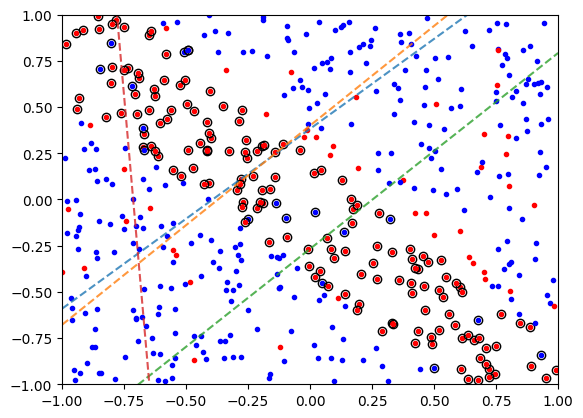

In [65]:
# Plot, let red be in the set
for mu in range(len(y_labels)):
    if y_labels[mu] == 1 :
        plt.plot(X_states[mu,0], X_states[mu,1],'r.')
    else :
        plt.plot(X_states[mu,0], X_states[mu,1],'b.')
    # plot classification of network as circles
    if Out[mu] == 1 :
        plt.plot(X_states[mu,0], X_states[mu,1],'ko',mfc='none')

# Plot decision boundaries of hidden neurons
x1_span = np.linspace(-1, 1, 100)
colors = plt.cm.tab10.colors  # distinct colors

for j in range(model.W1.shape[0]):
    w = model.W1[j]
    b = model.b1[j]
    color = colors[j % len(colors)]

    if abs(w[1]) < 1e-6:
        # vertical line: w0 * x - b = 0  ->  x = b / w0
        x = b / w[0]
        plt.axvline(x, linestyle="--", color=color, alpha=0.8)
    else:
        x2_span = (w[0] * x1_span - b) / w[1]
        plt.plot(x1_span, x2_span, "--", color=color, alpha=0.8)

plt.axis([-1, 1, -1, 1])
plt.show()

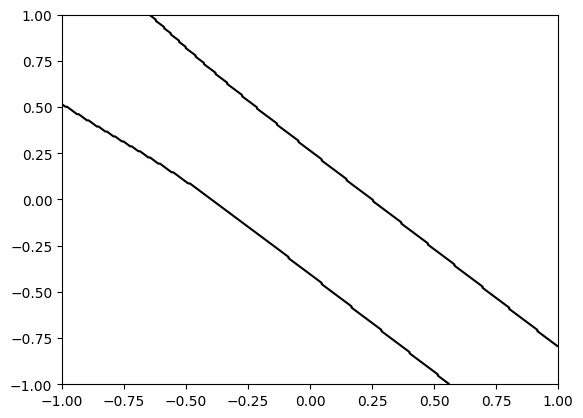

In [66]:
xx, yy = np.meshgrid(
    np.linspace(-1, 1, 300),
    np.linspace(-1, 1, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], colors='k')